## 1. 전국 대피소 관련 Insight 및 시각화

### 1-1 지역별 대피소 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('민방위대피_수용인구추가.csv', encoding = 'cp949')
df.head(3)

C:\Users\ter18\AppData\Local\Temp\ipykernel_22244\442923163.py:1: DtypeWarning: Columns (6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('민방위대피_수용인구추가.csv', encoding = 'cp949')


,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),비상시설위치,시설구분명,시설명건물명,해제일자
0,1,민방위대피시설,11_46_02_P,5090000,5090000-S198900003,1989-12-07,NaN,1,영업/정상,18,...,2023-07-07 16:19,U,2023-07-09 2:40,NaN,344927.8334,370456.1995,경상북도 영주시 하망동 344-34 대구은행,공공용시설,대구은행 지하주차장 1층,NaN
1,2,민방위대피시설,11_46_02_P,5090000,5090000-S197400001,1995-03-29,NaN,1,영업/정상,18,...,2023-07-07 15:16,U,2023-07-09 2:40,NaN,345125.7481,369669.8640,경상북도 영주시 휴천동 677 한국통신,공공용시설,KT영주지사 지하주차장 1층,NaN
2,3,민방위대피시설,11_46_02_P,5090000,5090000-S199200002,1992-05-26,NaN,1,영업/정상,18,...,2023-07-07 16:19,U,2023-07-09 2:40,NaN,345657.0132,370577.9119,경상북도 영주시 하망동 276-23 코오롱2차아파트,공공용시설,코오롱2차아파트 보일러실 1층,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40978 entries, 0 to 40977
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   번호        40978 non-null  int64  
 1   개방서비스명    40978 non-null  object 
 2   개방서비스아이디  40978 non-null  object 
 3   개방자치단체코드  40978 non-null  int64  
 4   관리번호      40978 non-null  object 
 5   인허가일자     40978 non-null  object 
 6   인허가취소일자   23699 non-null  object 
 7   영업상태구분코드  40978 non-null  int64  
 8   영업상태명     40978 non-null  object 
 9   상세영업상태코드  40978 non-null  int64  
 10  상세영업상태명   40978 non-null  object 
 11  폐업일자      23699 non-null  object 
 12  휴업시작일자    0 non-null      float64
 13  휴업종료일자    0 non-null      float64
 14  재개업일자     0 non-null      float64
 15  소재지전화     0 non-null      float64
 16  소재지면적     40978 non-null  float64
 17  대피가능인원수   40978 non-null  float64
 18  소재지우편번호   0 non-null      float64
 19  소재지전체주소   40800 non-null  object 
 20  도로명전체주소   28519 non-null  ob

In [4]:
df.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '대피가능인원수', '소재지우편번호', '소재지전체주소', '도로명전체주소',
       '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)',
       '좌표정보(y)', '비상시설위치', '시설구분명', '시설명건물명', '해제일자'],
      dtype='object')

In [5]:
df = df.drop(['개방서비스명' , '개방서비스아이디', '인허가취소일자' ,'휴업시작일자' ,'휴업종료일자','재개업일자', '소재지전화'
     ,'소재지우편번호' ,'업태구분명'], axis = 1)
df.columns

Index(['번호', '개방자치단체코드', '관리번호', '인허가일자', '영업상태구분코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '소재지면적', '대피가능인원수', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '좌표정보(x)', '좌표정보(y)', '비상시설위치',
       '시설구분명', '시설명건물명', '해제일자'],
      dtype='object')

In [6]:
print(df['상세영업상태코드'].unique())
print(df['상세영업상태명'].unique())

[18 19]
['사용중' '사용중지']


In [7]:
df = df[df['상세영업상태명'] == '사용중']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17279 entries, 0 to 17278
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   번호        17279 non-null  int64  
 1   개방자치단체코드  17279 non-null  int64  
 2   관리번호      17279 non-null  object 
 3   인허가일자     17279 non-null  object 
 4   영업상태구분코드  17279 non-null  int64  
 5   영업상태명     17279 non-null  object 
 6   상세영업상태코드  17279 non-null  int64  
 7   상세영업상태명   17279 non-null  object 
 8   폐업일자      0 non-null      object 
 9   소재지면적     17279 non-null  float64
 10  대피가능인원수   17279 non-null  float64
 11  소재지전체주소   17279 non-null  object 
 12  도로명전체주소   17272 non-null  object 
 13  도로명우편번호   16697 non-null  object 
 14  사업장명      17279 non-null  object 
 15  최종수정시점    17279 non-null  object 
 16  데이터갱신구분   17279 non-null  object 
 17  데이터갱신일자   17279 non-null  object 
 18  좌표정보(x)   17020 non-null  float64
 19  좌표정보(y)   17020 non-null  float64
 20  비상시설위치    17279 non-null  ob

In [8]:
print(df['상세영업상태코드'].unique())
print(df['상세영업상태명'].unique())

[18]
['사용중']


제주지역 대피소수

In [9]:
df_split = df['소재지전체주소'].str.split()
df_split

0                          [경상북도, 영주시, 하망동, 344-34, 대구은행]
1                             [경상북도, 영주시, 휴천동, 677, 한국통신]
2                      [경상북도, 영주시, 하망동, 276-23, 코오롱2차아파트]
3                             [경상북도, 영주시, 휴천동, 470, 영주시청]
4                          [경상북도, 영주시, 휴천동, 168, 현대동산아파트]
                               ...                       
17274                 [경상남도, 창녕군, 창녕읍, 술정리, 283-3, 신우희가로]
17275                          [세종특별자치시, 전동면, 노장리, 608-8]
17276    [대구광역시, 수성구, 범어동, 175-1, 브라운스톤, 범어, 지하주차장, 지하1층]
17277     [대구광역시, 수성구, 범어동, 177-1, 범어서한포레스트, 지하주차장, 지하1층]
17278     [서울특별시, 영등포구, 대림동, 1127, e편한세상, 영등포, 아델포레지하주차장]
Name: 소재지전체주소, Length: 17279, dtype: object

In [10]:
df2 =pd.DataFrame(df_split)
df2['시'] = df_split.str.get(0)
df2

,소재지전체주소,시
0,"[경상북도, 영주시, 하망동, 344-34, 대구은행]",경상북도
1,"[경상북도, 영주시, 휴천동, 677, 한국통신]",경상북도
2,"[경상북도, 영주시, 하망동, 276-23, 코오롱2차아파트]",경상북도
3,"[경상북도, 영주시, 휴천동, 470, 영주시청]",경상북도
4,"[경상북도, 영주시, 휴천동, 168, 현대동산아파트]",경상북도
...,...,...
17274,"[경상남도, 창녕군, 창녕읍, 술정리, 283-3, 신우희가로]",경상남도
17275,"[세종특별자치시, 전동면, 노장리, 608-8]",세종특별자치시
17276,"[대구광역시, 수성구, 범어동, 175-1, 브라운스톤, 범어, 지하주차장, 지하1층]",대구광역시
17277,"[대구광역시, 수성구, 범어동, 177-1, 범어서한포레스트, 지하주차장, 지하1층]",대구광역시


In [11]:
df2[df2['시']=='제주특별자치도']

,소재지전체주소,시
736,"[제주특별자치도, 서귀포시, 안덕면, 상창리, 2893, 테디밸리골프&리조트]",제주특별자치도
1382,"[제주특별자치도, 제주시, 노형동, 731-1, 노형아이파크]",제주특별자치도
1383,"[제주특별자치도, 제주시, 이도일동, 1688번지, 9호]",제주특별자치도
1384,"[제주특별자치도, 제주시, 이도일동, 1688번지, 7호]",제주특별자치도
1385,"[제주특별자치도, 제주시, 연동, 276번지, 9호]",제주특별자치도
...,...,...
14847,"[제주특별자치도, 서귀포시, 서홍동, 305-2, 지오빌Ⅱ-2차, 아파트, 지하1층]",제주특별자치도
15497,"[제주특별자치도, 제주시, 외도일동, 641번지, 1호]",제주특별자치도
15544,"[제주특별자치도, 제주시, 연동, 257번지]",제주특별자치도
15561,"[제주특별자치도, 제주시, 이도이동, 405, 영산홍주택(지하1층), 108동]",제주특별자치도


In [12]:
df3 = df2[df2['시']=='제주특별자치도']

In [13]:
df3['소재지전체주소']

736          [제주특별자치도, 서귀포시, 안덕면, 상창리, 2893, 테디밸리골프&리조트]
1382                  [제주특별자치도, 제주시, 노형동, 731-1, 노형아이파크]
1383                    [제주특별자치도, 제주시, 이도일동, 1688번지, 9호]
1384                    [제주특별자치도, 제주시, 이도일동, 1688번지, 7호]
1385                       [제주특별자치도, 제주시, 연동, 276번지, 9호]
                              ...                       
14847    [제주특별자치도, 서귀포시, 서홍동, 305-2, 지오빌Ⅱ-2차, 아파트, 지하1층]
15497                    [제주특별자치도, 제주시, 외도일동, 641번지, 1호]
15544                          [제주특별자치도, 제주시, 연동, 257번지]
15561       [제주특별자치도, 제주시, 이도이동, 405, 영산홍주택(지하1층), 108동]
17230              [제주특별자치도, 제주시, 화북일동, 1976-7, 화북동주민센터]
Name: 소재지전체주소, Length: 442, dtype: object

In [14]:
df3['읍면동'] = df3['소재지전체주소'].str.get(2)

C:\Users\ter18\AppData\Local\Temp\ipykernel_22244\2316839341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['읍면동'] = df3['소재지전체주소'].str.get(2)


In [15]:
df3

,소재지전체주소,시,읍면동
736,"[제주특별자치도, 서귀포시, 안덕면, 상창리, 2893, 테디밸리골프&리조트]",제주특별자치도,안덕면
1382,"[제주특별자치도, 제주시, 노형동, 731-1, 노형아이파크]",제주특별자치도,노형동
1383,"[제주특별자치도, 제주시, 이도일동, 1688번지, 9호]",제주특별자치도,이도일동
1384,"[제주특별자치도, 제주시, 이도일동, 1688번지, 7호]",제주특별자치도,이도일동
1385,"[제주특별자치도, 제주시, 연동, 276번지, 9호]",제주특별자치도,연동
...,...,...,...
14847,"[제주특별자치도, 서귀포시, 서홍동, 305-2, 지오빌Ⅱ-2차, 아파트, 지하1층]",제주특별자치도,서홍동
15497,"[제주특별자치도, 제주시, 외도일동, 641번지, 1호]",제주특별자치도,외도일동
15544,"[제주특별자치도, 제주시, 연동, 257번지]",제주특별자치도,연동
15561,"[제주특별자치도, 제주시, 이도이동, 405, 영산홍주택(지하1층), 108동]",제주특별자치도,이도이동


In [16]:
df3['읍면동']

736       안덕면
1382      노형동
1383     이도일동
1384     이도일동
1385       연동
         ... 
14847     서홍동
15497    외도일동
15544      연동
15561    이도이동
17230    화북일동
Name: 읍면동, Length: 442, dtype: object

In [70]:
df3['읍면동'].value_counts().index()

연동      45
이도이동    45
일도이동    37
동홍동     23
노형동     21
서귀동     19
이도일동    16
용담이동    14
건입동     12
삼도이동    11
화북일동    11
조천읍     10
삼도일동     9
용담일동     9
성산읍      9
남원읍      9
대정읍      8
강정동      8
서홍동      7
이호이동     7
오라이동     6
안덕면      6
법환동      6
아라이동     6
중문동      6
서호동      5
월평동      5
외도일동     5
삼양이동     5
아라일동     5
표선면      4
도남동      4
한림읍      4
용담삼동     4
애월읍      4
토평동      3
일도일동     3
삼양일동     3
한경면      3
구좌읍      3
색달동      2
신효동      2
도련이동     2
오라일동     2
도두일동     2
화북이동     2
봉개동      2
상효동      2
상예동      1
추자면      1
우도면      1
하효동      1
도순동      1
이호일동     1
Name: 읍면동, dtype: int64

In [74]:
jeju_dong = pd.DataFrame(df3['읍면동'].value_counts())

In [76]:
jeju_dong

,읍면동
연동,45
이도이동,45
일도이동,37
동홍동,23
노형동,21
서귀동,19
이도일동,16
용담이동,14
건입동,12
삼도이동,11


In [ ]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df.sort_values(by='10만명 당 대피소 수' ,ascending=False).reset_index().rename(columns={'index': '시'}), x="시", y='10만명 당 대피소 수', palette="Blues_d")
plt.show()

In [83]:
jeju_dong.sort_values(by='읍면동', ascending=False).reset_index().rename(columns={'index': '읍면동', '읍면동':'대피소수'})

,읍면동,대피소수
0,연동,45
1,이도이동,45
2,일도이동,37
3,동홍동,23
4,노형동,21
5,서귀동,19
6,이도일동,16
7,용담이동,14
8,건입동,12
9,삼도이동,11


In [113]:
jeju_dong_cnt = jeju_dong.sort_values(by='읍면동', ascending=False).reset_index().rename(columns={'index': '읍면동', '읍면동':'대피소수'})

In [119]:
jeju_dong_cnt.to_csv('제주_법정동_카운트.csv', encoding='cp949')

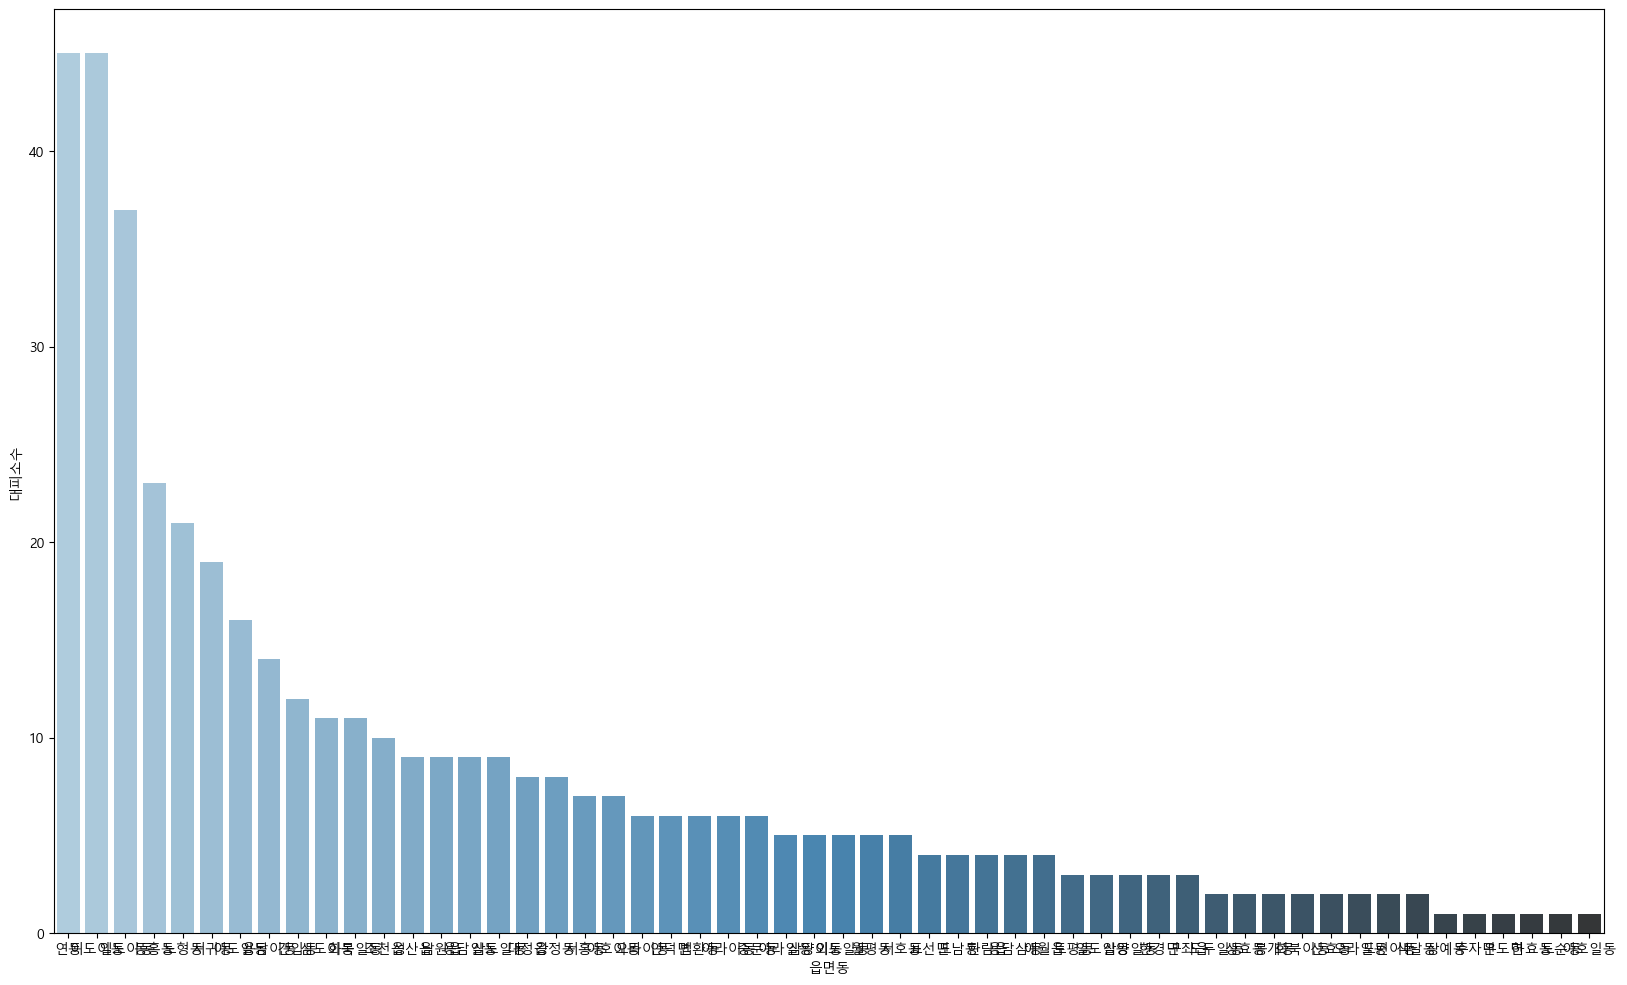

In [92]:
plt.figure(figsize=(20, 12))
sns.barplot(data=jeju_dong.sort_values(by='읍면동', ascending=False).reset_index().rename(columns={'index': '읍면동', '읍면동':'대피소수'}),x='읍면동', y='대피소수', palette="Blues_d")
plt.show()

In [96]:
pwd

'C:\\Users\\ter18\\mysite\\flnal_project\\Team2_Jupyter_code'

In [104]:
dong_popul = pd.read_csv('인구및세대현황.csv',encoding='utf-8')

In [107]:
dong_popul.columns

Index(['행정기관', 'Unnamed: 1', '전체', '남성', '여성', '세대수', '세대당인구'], dtype='object')

In [111]:
dong_popul = pd.read_csv('인구및세대현황.csv',encoding='utf-8').drop(columns=['Unnamed: 1'])

In [112]:
dong_popul

,행정기관,전체,남성,여성,세대수,세대당인구
0,제주시,"491,987","245,763","246,224","224,454",2.19
1,한림읍,"20,939","10,801","10,138","10,742",1.95
2,애월읍,"37,821","19,391","18,430","17,706",2.14
3,구좌읍,"15,359","7,845","7,514","8,058",1.91
4,조천읍,"25,778","13,182","12,596","11,987",2.15
5,한경면,"9,589","4,791","4,798","5,143",1.86
6,추자면,"1,575",859,716,952,1.65
7,우도면,"1,610",862,748,864,1.86
8,일도1동,"2,193","1,146","1,047","1,333",1.65
9,일도2동,"31,568","15,469","16,099","13,423",2.35


In [98]:
pd.read_csv('제주_읍면동_정보.csv', encoding='utf-8')

,이름,한자,인구,면적,법정동·리
0,한림읍,翰林邑,"23,143",91.09,"귀덕리,금능리,금악리,대림리,동명리,명월리,상대리,상명리,수원리"
1,NaN,NaN,NaN,NaN,"옹포리,월령리,월림리,한림리,한수리,협재리"
2,애월읍,涯月邑,"31,790",202.16,"고내리,고성리,곽지리,광령리,구엄리,금성리,남읍리,봉성리,상가리,상귀리"
3,NaN,NaN,NaN,NaN,"소길리,수산리,신엄리,애월리,어음리,유수암리,장전리,하가리,하귀1리,하귀2리"
4,구좌읍,舊左邑,"15,216",185.93,"김녕리,덕천리,동복리,상도리,세화리,송당리,월정리,종달리,평대리,하도리,한동리,행원리"
5,조천읍,朝天邑,"21,547",150.64,"교래리,대흘리,북촌리,선흘리,신촌리,신흥리,와산리,와흘리,조천리,함덕리"
6,한경면,翰京面,"8,775",79.03,"고산리,금등리,낙천리,두모리,신창리,용수리,저지리,조수리,청수리,판포리"
7,추자면,楸子面,"2,417",7.05,"대서리,묵리,신양리,영흥리,예초리"
8,우도면,牛島面,"1,752",6.18,연평리
9,일도1동,一徒洞,"3,428",0.33,일도1동


In [99]:
dong_info = pd.read_csv('제주_읍면동_정보.csv', encoding='utf-8')

In [ ]:
dong_info[]

### 주소로부터 지역 추출

In [18]:
df_split = df['소재지전체주소'].str.split()
df_split

0                          [경상북도, 영주시, 하망동, 344-34, 대구은행]
1                             [경상북도, 영주시, 휴천동, 677, 한국통신]
2                      [경상북도, 영주시, 하망동, 276-23, 코오롱2차아파트]
3                             [경상북도, 영주시, 휴천동, 470, 영주시청]
4                          [경상북도, 영주시, 휴천동, 168, 현대동산아파트]
                               ...                       
17274                 [경상남도, 창녕군, 창녕읍, 술정리, 283-3, 신우희가로]
17275                          [세종특별자치시, 전동면, 노장리, 608-8]
17276    [대구광역시, 수성구, 범어동, 175-1, 브라운스톤, 범어, 지하주차장, 지하1층]
17277     [대구광역시, 수성구, 범어동, 177-1, 범어서한포레스트, 지하주차장, 지하1층]
17278     [서울특별시, 영등포구, 대림동, 1127, e편한세상, 영등포, 아델포레지하주차장]
Name: 소재지전체주소, Length: 17279, dtype: object

In [19]:
# 새 column 생성
df['시'] = df_split.str.get(0)
df.head()

,번호,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지면적,...,최종수정시점,데이터갱신구분,데이터갱신일자,좌표정보(x),좌표정보(y),비상시설위치,시설구분명,시설명건물명,해제일자,시
0,1,5090000,5090000-S198900003,1989-12-07,1,영업/정상,18,사용중,NaN,298.0,...,2023-07-07 16:19,U,2023-07-09 2:40,344927.8334,370456.1995,경상북도 영주시 하망동 344-34 대구은행,공공용시설,대구은행 지하주차장 1층,NaN,경상북도
1,2,5090000,5090000-S197400001,1995-03-29,1,영업/정상,18,사용중,NaN,119.0,...,2023-07-07 15:16,U,2023-07-09 2:40,345125.7481,369669.8640,경상북도 영주시 휴천동 677 한국통신,공공용시설,KT영주지사 지하주차장 1층,NaN,경상북도
2,3,5090000,5090000-S199200002,1992-05-26,1,영업/정상,18,사용중,NaN,965.0,...,2023-07-07 16:19,U,2023-07-09 2:40,345657.0132,370577.9119,경상북도 영주시 하망동 276-23 코오롱2차아파트,공공용시설,코오롱2차아파트 보일러실 1층,NaN,경상북도
3,4,5090000,5090000-S199200004,1992-11-09,1,영업/정상,18,사용중,NaN,661.0,...,2023-07-09 17:23,U,2023-07-11 2:40,344866.7374,368384.0006,경상북도 영주시 휴천동 470 영주시청,공공용시설,영주시청 대피소 주차장 지하1층,NaN,경상북도
4,5,5090000,5090000-S199800002,1998-03-01,1,영업/정상,18,사용중,NaN,3461.0,...,2023-07-10 16:01,U,2023-07-13 2:40,345499.7726,369763.1124,경상북도 영주시 휴천동 168 현대동산아파트,공공용시설,현대동산아파트 지하주차장 1층,NaN,경상북도


In [20]:
df['시'].unique()

array(['경상북도', '경상남도', '전라북도', '충청남도', '경기도', '서울특별시', '인천광역시', '충청북도',
       '부산광역시', '전라남도', '대구광역시', '세종특별자치시', '광주광역시', '강원특별자치도', '울산광역시',
       '제주특별자치도', '대전광역시'], dtype=object)

In [21]:
n_shel = pd.DataFrame(df['시'].value_counts())
n_shel.rename(columns={'시':'대피소 수'}, inplace=True)
n_shel

,대피소 수
경기도,3921
서울특별시,3070
부산광역시,1314
경상남도,1238
전라남도,797
인천광역시,793
대구광역시,768
경상북도,762
대전광역시,745
강원특별자치도,690


In [22]:
n_shel.columns

Index(['대피소 수'], dtype='object')

In [23]:
df['시'].unique()

array(['경상북도', '경상남도', '전라북도', '충청남도', '경기도', '서울특별시', '인천광역시', '충청북도',
       '부산광역시', '전라남도', '대구광역시', '세종특별자치시', '광주광역시', '강원특별자치도', '울산광역시',
       '제주특별자치도', '대전광역시'], dtype=object)

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 또는 설치한 폰트의 정확한 이름을 사용합니다.

In [63]:
fm.

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

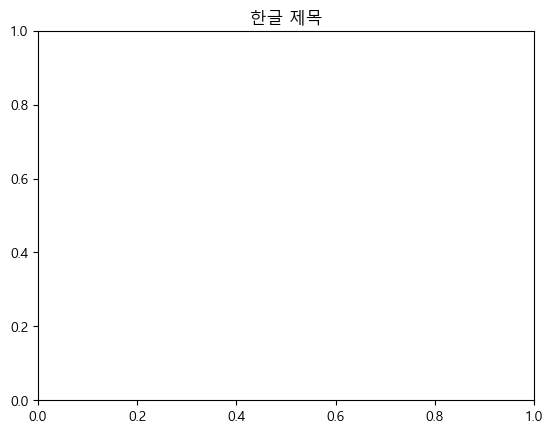

In [67]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.title('한글 제목')
plt.show()

# 시별 대피소 수 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  self._f

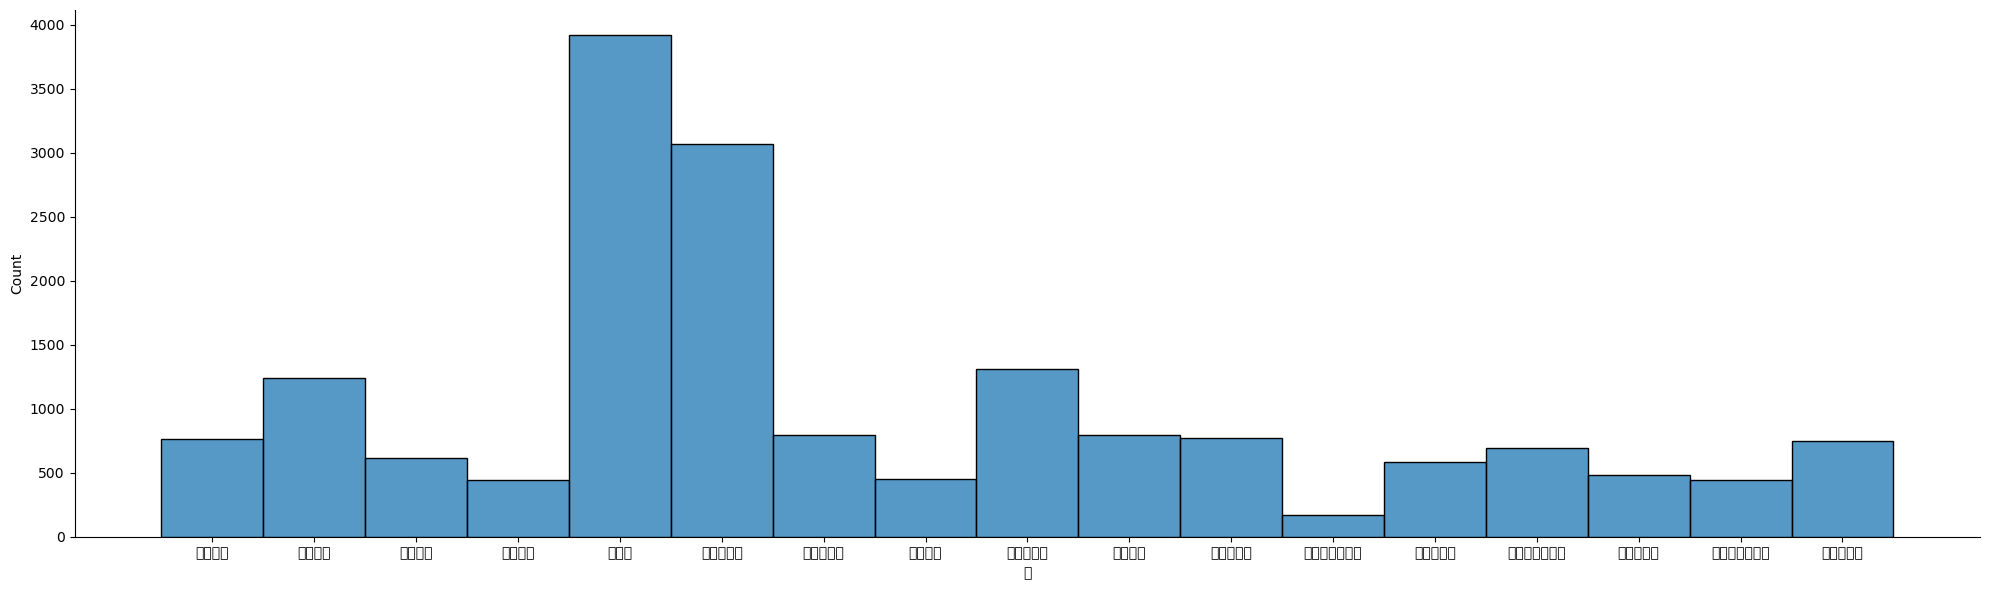

In [27]:
sns.displot(data=df, x="시", height=6, aspect=20/6)
plt.show()

In [28]:
# 인구 및 면적 대비 대피소 수 비교
popul = pd.read_csv('행정구역_시군구_별__성별_인구수_20231215103505.csv', encoding='cp949')
popul.head()

,행정구역(시군구)별,2023.09,2023.09.1,2023.09.2,2023.10,2023.10.1,2023.10.2,2023.11,2023.11.1,2023.11.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51370001,25592335,25777666,51354226,25582773,25771453,51337076,25572695,25764381
2,서울특별시,9407540,4552501,4855039,9400249,4548150,4852099,9390925,4543055,4847870
3,부산광역시,3300836,1609650,1691186,3298213,1608156,1690057,3295496,1606680,1688816
4,대구광역시,2377801,1168679,1209122,2376978,1168087,1208891,2376044,1167480,1208564


In [29]:
popul.columns

Index(['행정구역(시군구)별', '2023.09', '2023.09.1', '2023.09.2', '2023.10',
       '2023.10.1', '2023.10.2', '2023.11', '2023.11.1', '2023.11.2'],
      dtype='object')

In [30]:
popul_n = popul.iloc[:,0:2]

In [31]:
popul_n

,행정구역(시군구)별,2023.09
0,행정구역(시군구)별,총인구수 (명)
1,전국,51370001
2,서울특별시,9407540
3,부산광역시,3300836
4,대구광역시,2377801
5,인천광역시,2987918
6,광주광역시,1422999
7,대전광역시,1444595
8,울산광역시,1104167
9,세종특별자치시,385932


In [32]:
popul_n.rename({'2023.09':'인구'}, inplace=True)

C:\Users\ter18\AppData\Local\Temp\ipykernel_22244\315433079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popul_n.rename({'2023.09':'인구'}, inplace=True)


In [33]:
popul_n.columns=['행정구역','인구']

In [34]:
popul_n.drop(0, inplace=True)

C:\Users\ter18\AppData\Local\Temp\ipykernel_22244\1227795128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popul_n.drop(0, inplace=True)


In [35]:
popul_n

,행정구역,인구
1,전국,51370001
2,서울특별시,9407540
3,부산광역시,3300836
4,대구광역시,2377801
5,인천광역시,2987918
6,광주광역시,1422999
7,대전광역시,1444595
8,울산광역시,1104167
9,세종특별자치시,385932
10,경기도,13626339


In [36]:
popul_n = popul_n.set_index('행정구역')
popul_n

,인구
행정구역,
전국,51370001
서울특별시,9407540
부산광역시,3300836
대구광역시,2377801
인천광역시,2987918
광주광역시,1422999
대전광역시,1444595
울산광역시,1104167
세종특별자치시,385932


In [37]:
popul_n.drop('전국', inplace=True)

In [38]:
# 대피소 수와 합치기
df = pd.merge(n_shel, popul_n, left_index=True, right_index=True, how='left')

In [39]:
df

,대피소 수,인구
경기도,3921,13626339
서울특별시,3070,9407540
부산광역시,1314,3300836
경상남도,1238,3257009
전라남도,797,1807295
인천광역시,793,2987918
대구광역시,768,2377801
경상북도,762,2559924
대전광역시,745,1444595
강원특별자치도,690,1530712


In [40]:
area = pd.read_csv('지역별_면적.csv', encoding='cp949', index_col='행정구역')
area

,면적 (㎢)
행정구역,
서울특별시,605
부산광역시,770
대구광역시,884
인천광역시,"1,066"
광주광역시,501
대전광역시,540
울산광역시,"1,062"
세종특별자치시,465
경기도,"10,197"


In [41]:
df = pd.merge(df, area, left_index=True, right_index=True, how='left')
df

,대피소 수,인구,면적 (㎢)
경기도,3921,13626339,"10,197"
서울특별시,3070,9407540,605
부산광역시,1314,3300836,770
경상남도,1238,3257009,"10,542"
전라남도,797,1807295,"12,359"
인천광역시,793,2987918,"1,066"
대구광역시,768,2377801,884
경상북도,762,2559924,"19,035"
대전광역시,745,1444595,540
강원특별자치도,690,1530712,"16,830"


In [42]:
df['면적 (㎢)'] = df['면적 (㎢)'].str.replace(',','').astype('int64')
df['인구'] = df['인구'].astype('int64')
df

,대피소 수,인구,면적 (㎢)
경기도,3921,13626339,10197
서울특별시,3070,9407540,605
부산광역시,1314,3300836,770
경상남도,1238,3257009,10542
전라남도,797,1807295,12359
인천광역시,793,2987918,1066
대구광역시,768,2377801,884
경상북도,762,2559924,19035
대전광역시,745,1444595,540
강원특별자치도,690,1530712,16830


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 경기도 to 세종특별자치시
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   대피소 수   17 non-null     int64
 1   인구      17 non-null     int64
 2   면적 (㎢)  17 non-null     int64
dtypes: int64(3)
memory usage: 1.1+ KB


In [44]:
# 전국
df_all = pd.DataFrame(df.sum())
df_all

,0
대피소 수,17279
인구,51370001
면적 (㎢),100432


In [45]:
density_pop = df_all.iloc[0, 0] / (df_all.iloc[1, 0] / 100000)
density_area = df_all.iloc[0, 0] / df_all.iloc[2, 0]
print(f'10만명 당 대피소 수 : {density_pop:.3f}')
print(f'1km2 당 대피소 수 : {density_area:.3f}')

10만명 당 대피소 수 : 33.636
1km2 당 대피소 수 : 0.172


In [46]:
df['10만명 당 대피소 수'] = df['대피소 수'] / (df['인구']/100000)
df['1km2 당 대피소 수'] = df['대피소 수'] / df['면적 (㎢)']

In [47]:
#10만명 당 대피소 수 내림차순 정리
df.sort_values(by='10만명 당 대피소 수' ,ascending=False)

,대피소 수,인구,면적 (㎢),10만명 당 대피소 수,1km2 당 대피소 수
제주특별자치도,442,676317,1850,65.353969,0.238919
대전광역시,745,1444595,540,51.571548,1.379630
강원특별자치도,690,1530712,16830,45.077062,0.040998
전라남도,797,1807295,12359,44.099054,0.064487
울산광역시,484,1104167,1062,43.833949,0.455744
세종특별자치시,166,385932,465,43.012759,0.356989
광주광역시,582,1422999,501,40.899537,1.161677
부산광역시,1314,3300836,770,39.808097,1.706494
경상남도,1238,3257009,10542,38.010334,0.117435
전라북도,616,1758661,8072,35.026648,0.076313


In [126]:
df['인구 당 면적'] = df['인구']/(df.iloc[:,2]*1000)

In [127]:
df

,대피소 수,인구,면적 (㎢),10만명 당 대피소 수,1km2 당 대피소 수,광역지자체 방문자 수,방문자 및 인구합,10만명 당 대피소 수_방문포함,인구 당 면적
경기도,3921,13626339,10197,28.775154,0.384525,17494545558,17508171897,0.022395,1.336309
서울특별시,3070,9407540,605,32.633398,5.074380,9779942025,9789349565,0.031361,15.549653
부산광역시,1314,3300836,770,39.808097,1.706494,1589972928,1593273764,0.082472,4.286800
경상남도,1238,3257009,10542,38.010334,0.117435,22780211416,22783468425,0.005434,0.308956
전라남도,797,1807295,12359,44.099054,0.064487,1873485130,1875292425,0.042500,0.146233
인천광역시,793,2987918,1066,26.540220,0.743902,1181464090,1184452008,0.066951,2.802925
대구광역시,768,2377801,884,32.298750,0.868778,537681744,540059545,0.142207,2.689820
경상북도,762,2559924,19035,29.766509,0.040032,2869667304,2872227228,0.026530,0.134485
대전광역시,745,1444595,540,51.571548,1.379630,269584975,271029570,0.274878,2.675176
강원특별자치도,690,1530712,16830,45.077062,0.040998,1866408516,1867939228,0.036939,0.090951


# 전국 대피소 10만 명 기준으로 시각화

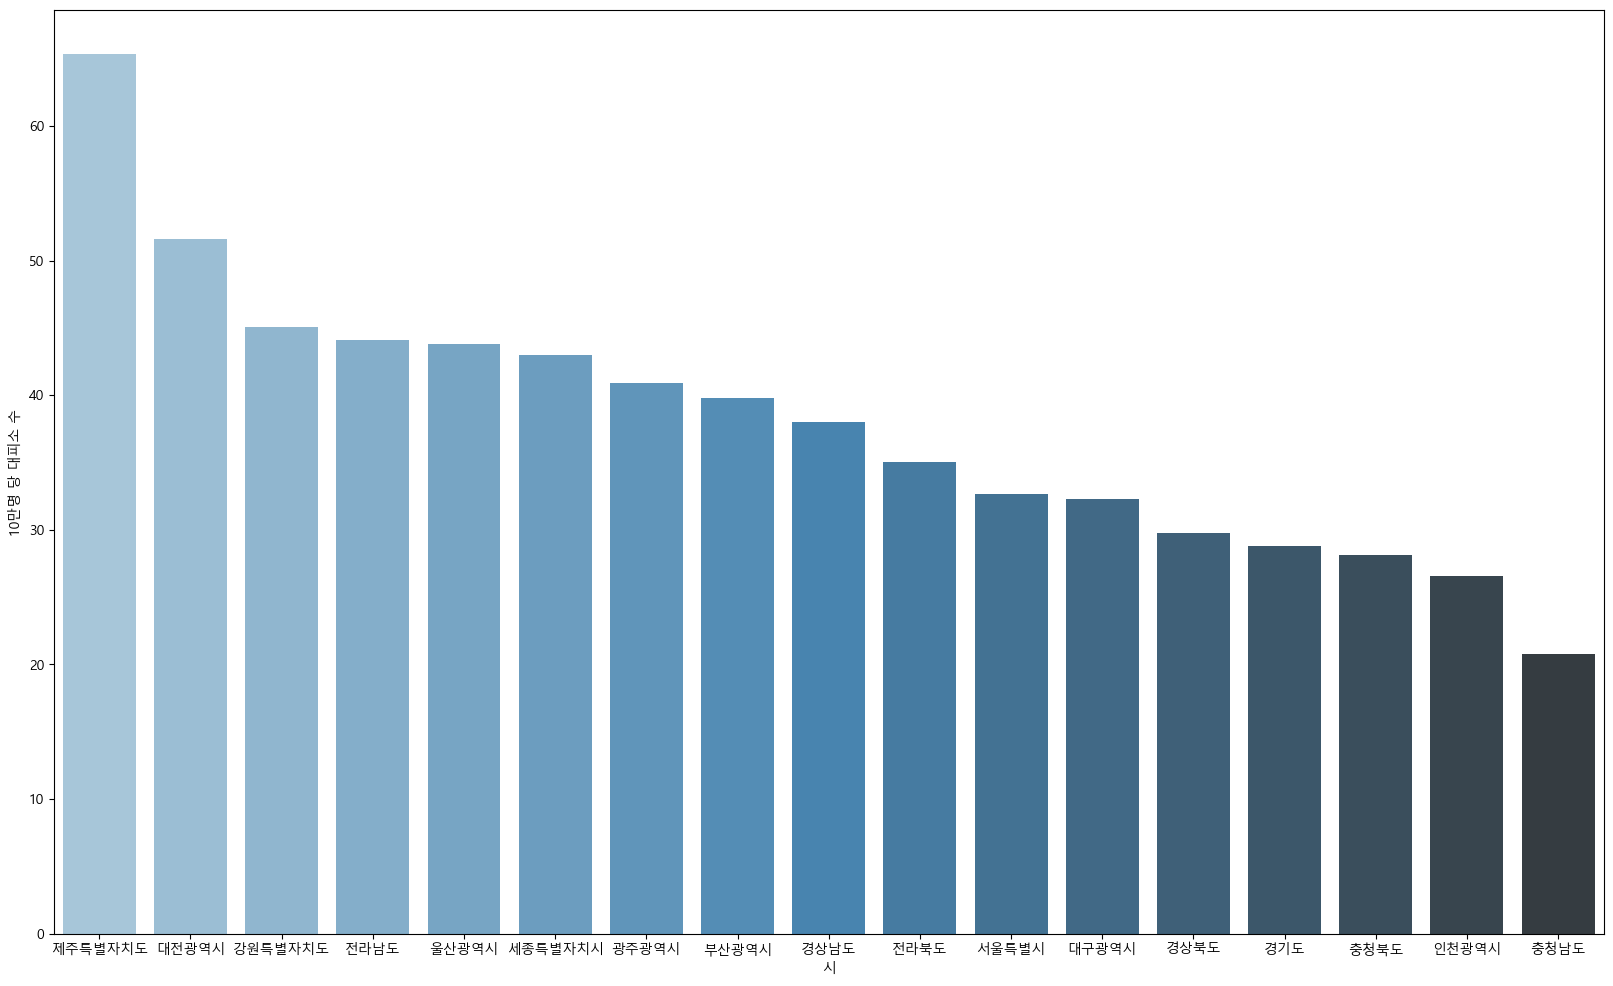

In [68]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df.sort_values(by='10만명 당 대피소 수' ,ascending=False).reset_index().rename(columns={'index': '시'}), x="시", y='10만명 당 대피소 수', palette="Blues_d")
plt.show()

In [49]:
# 1km2 당 대피소 수 내림차순 정리
df.sort_values(by='1km2 당 대피소 수' ,ascending=False)

,대피소 수,인구,면적 (㎢),10만명 당 대피소 수,1km2 당 대피소 수
서울특별시,3070,9407540,605,32.633398,5.074380
부산광역시,1314,3300836,770,39.808097,1.706494
대전광역시,745,1444595,540,51.571548,1.379630
광주광역시,582,1422999,501,40.899537,1.161677
대구광역시,768,2377801,884,32.298750,0.868778
인천광역시,793,2987918,1066,26.540220,0.743902
울산광역시,484,1104167,1062,43.833949,0.455744
경기도,3921,13626339,10197,28.775154,0.384525
세종특별자치시,166,385932,465,43.012759,0.356989
제주특별자치도,442,676317,1850,65.353969,0.238919


In [131]:
df.sort_values(by='1km2 당 대피소 수' ,ascending=False).to_csv('키로 당 대피소수.csv', encoding='utf-8')

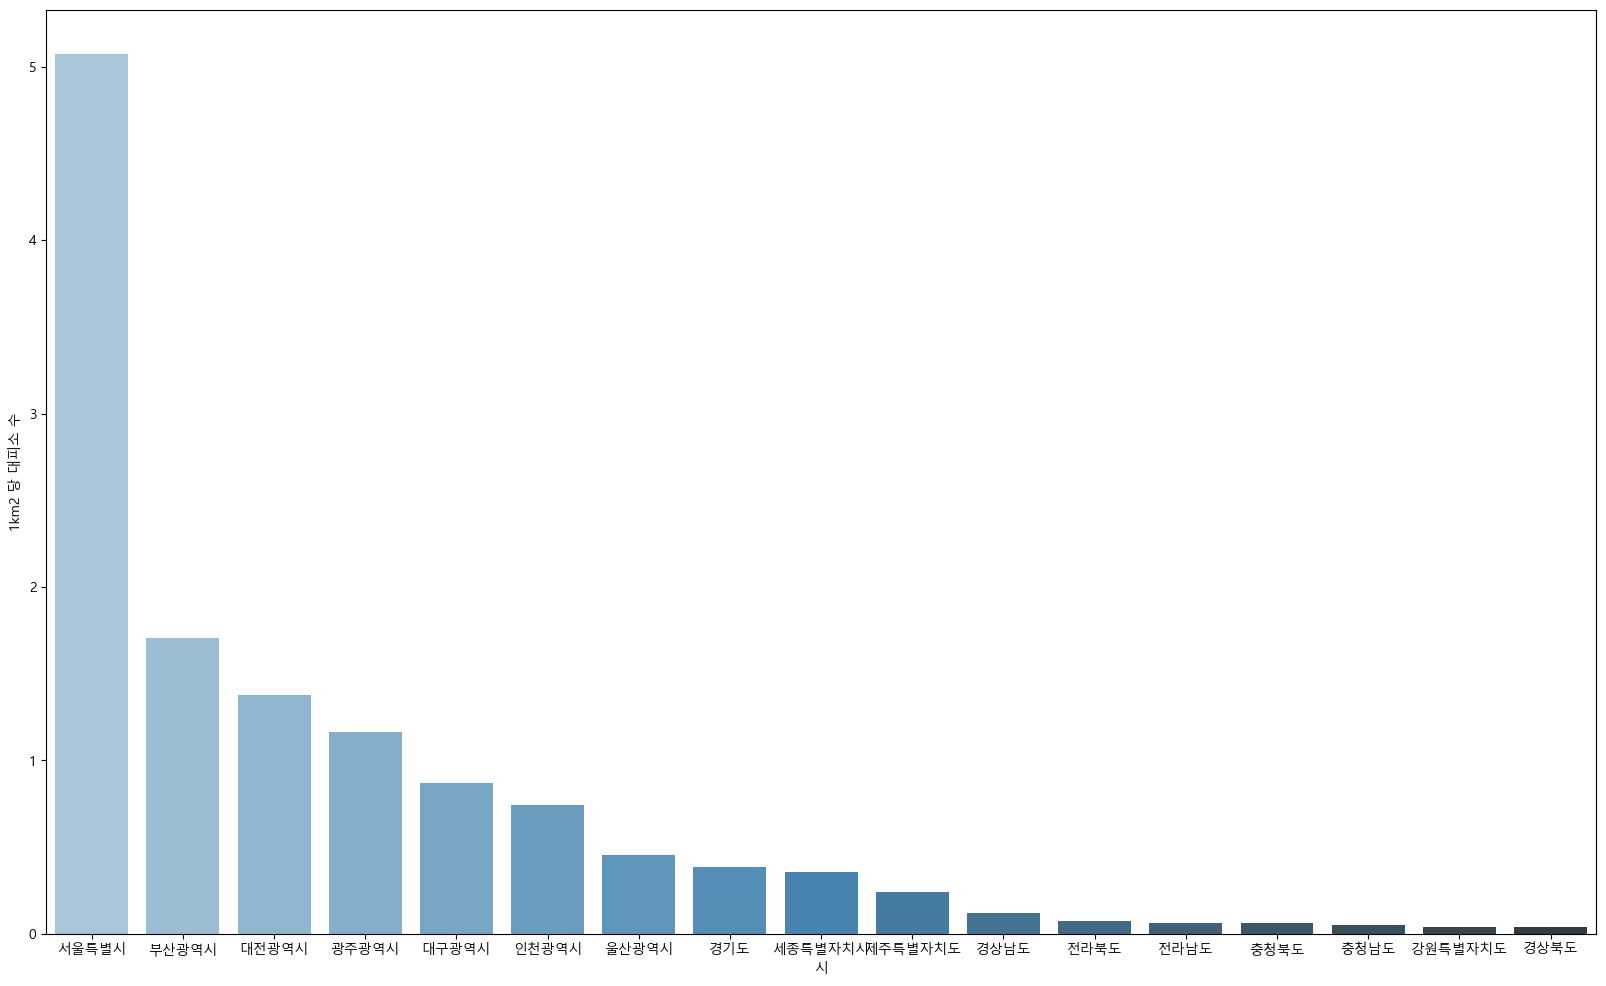

In [128]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df.sort_values(by='1km2 당 대피소 수' ,ascending=False).reset_index().rename(columns={'index': '시'}), x="시", y='1km2 당 대피소 수', palette="Blues_d")
plt.show()

# 제주도 관광객 고려, 방문자수 추가해 시각화

In [51]:
visit = pd.read_csv('광역별_방문자수.csv', encoding='cp949')
visit.head()

,행정구역,광역지자체 방문자 수
0,강원특별자치도,1866408516
1,경기도,17494545558
2,경상남도,22780211416
3,경상북도,2869667304
4,광주광역시,217711400


In [52]:
visit = visit.set_index('행정구역')
visit

,광역지자체 방문자 수
행정구역,
강원특별자치도,1866408516
경기도,17494545558
경상남도,22780211416
경상북도,2869667304
광주광역시,217711400
대구광역시,537681744
대전광역시,269584975
부산광역시,1589972928
서울특별시,9779942025


In [53]:
visit.rename

<bound method DataFrame.rename of          광역지자체 방문자 수
행정구역                
강원특별자치도   1866408516
경기도      17494545558
경상남도     22780211416
경상북도      2869667304
광주광역시      217711400
대구광역시      537681744
대전광역시      269584975
부산광역시     1589972928
서울특별시     9779942025
세종특별자치시     18217258
울산광역시      163397400
인천광역시     1181464090
전라남도      1873485130
전라북도       944695530
제주특별자치도     84596576
충청남도      1735944144
충청북도      1038889502>

In [54]:
df = pd.merge(df, visit, left_index=True, right_index=True, how='left')
df.head()

,대피소 수,인구,면적 (㎢),10만명 당 대피소 수,1km2 당 대피소 수,광역지자체 방문자 수
경기도,3921,13626339,10197,28.775154,0.384525,17494545558
서울특별시,3070,9407540,605,32.633398,5.074380,9779942025
부산광역시,1314,3300836,770,39.808097,1.706494,1589972928
경상남도,1238,3257009,10542,38.010334,0.117435,22780211416
전라남도,797,1807295,12359,44.099054,0.064487,1873485130


In [142]:
df

,대피소 수,인구,면적 (㎢),10만명 당 대피소 수,1km2 당 대피소 수,광역지자체 방문자 수,방문자 및 인구합,10만명 당 대피소 수_방문포함,인구 당 면적
경기도,3921,13626339,10197,28.775154,0.384525,17494545558,17508171897,0.022395,1.336309
서울특별시,3070,9407540,605,32.633398,5.074380,9779942025,9789349565,0.031361,15.549653
부산광역시,1314,3300836,770,39.808097,1.706494,1589972928,1593273764,0.082472,4.286800
경상남도,1238,3257009,10542,38.010334,0.117435,22780211416,22783468425,0.005434,0.308956
전라남도,797,1807295,12359,44.099054,0.064487,1873485130,1875292425,0.042500,0.146233
인천광역시,793,2987918,1066,26.540220,0.743902,1181464090,1184452008,0.066951,2.802925
대구광역시,768,2377801,884,32.298750,0.868778,537681744,540059545,0.142207,2.689820
경상북도,762,2559924,19035,29.766509,0.040032,2869667304,2872227228,0.026530,0.134485
대전광역시,745,1444595,540,51.571548,1.379630,269584975,271029570,0.274878,2.675176
강원특별자치도,690,1530712,16830,45.077062,0.040998,1866408516,1867939228,0.036939,0.090951


In [140]:
df2 = df.iloc[:,[0,1]]
df2['인구대비방문자'] = df['광역지자체 방문자 수']/df['인구']
df2.sort_values(by='인구대비방문자')

C:\Users\ter18\AppData\Local\Temp\ipykernel_22244\4257981853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['인구대비방문자'] = df['광역지자체 방문자 수']/df['인구']


,대피소 수,인구,인구대비방문자
세종특별자치시,166,385932,47.203285
제주특별자치도,442,676317,125.084208
울산광역시,484,1104167,147.982506
광주광역시,582,1422999,152.994767
대전광역시,745,1444595,186.616301
대구광역시,768,2377801,226.125628
인천광역시,793,2987918,395.413827
부산광역시,1314,3300836,481.687951
전라북도,616,1758661,537.167498
충청북도,449,1594326,651.616735


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 경기도 to 세종특별자치시
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대피소 수         17 non-null     int64  
 1   인구            17 non-null     int64  
 2   면적 (㎢)        17 non-null     int64  
 3   10만명 당 대피소 수  17 non-null     float64
 4   1km2 당 대피소 수  17 non-null     float64
 5   광역지자체 방문자 수   17 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.5+ KB


In [57]:
df.loc[:, '방문자 및 인구합'] = df.loc[:,['광역지자체 방문자 수','인구']].sum(axis=1)
df

,대피소 수,인구,면적 (㎢),10만명 당 대피소 수,1km2 당 대피소 수,광역지자체 방문자 수,방문자 및 인구합
경기도,3921,13626339,10197,28.775154,0.384525,17494545558,17508171897
서울특별시,3070,9407540,605,32.633398,5.074380,9779942025,9789349565
부산광역시,1314,3300836,770,39.808097,1.706494,1589972928,1593273764
경상남도,1238,3257009,10542,38.010334,0.117435,22780211416,22783468425
전라남도,797,1807295,12359,44.099054,0.064487,1873485130,1875292425
인천광역시,793,2987918,1066,26.540220,0.743902,1181464090,1184452008
대구광역시,768,2377801,884,32.298750,0.868778,537681744,540059545
경상북도,762,2559924,19035,29.766509,0.040032,2869667304,2872227228
대전광역시,745,1444595,540,51.571548,1.379630,269584975,271029570
강원특별자치도,690,1530712,16830,45.077062,0.040998,1866408516,1867939228


In [58]:
df_all2 = pd.DataFrame(df.sum())
df_all2

,0
대피소 수,1.727900e+04
인구,5.137000e+07
면적 (㎢),1.004320e+05
10만명 당 대피소 수,6.456436e+02
1km2 당 대피소 수,1.282452e+01
광역지자체 방문자 수,6.444642e+10
방문자 및 인구합,6.449779e+10


In [59]:
density_pop = df_all2.iloc[0, 0] / (df_all2.iloc[6, 0] / 100000)
density_area = df_all2.iloc[0, 0] / df_all2.iloc[2, 0]
print(f'10만명 당 대피소 수_방문포함 : {density_pop:.3f}')
print(f'1km2 당 대피소 수 : {density_area:.3f}')

10만명 당 대피소 수_방문포함 : 0.027
1km2 당 대피소 수 : 0.172


In [60]:
df['10만명 당 대피소 수_방문포함'] = df['대피소 수'] / (df['방문자 및 인구합']/100000)

In [61]:
df.sort_values(by='10만명 당 대피소 수_방문포함' ,ascending=False)

,대피소 수,인구,면적 (㎢),10만명 당 대피소 수,1km2 당 대피소 수,광역지자체 방문자 수,방문자 및 인구합,10만명 당 대피소 수_방문포함
세종특별자치시,166,385932,465,43.012759,0.356989,18217258,18603190,0.892320
제주특별자치도,442,676317,1850,65.353969,0.238919,84596576,85272893,0.518336
울산광역시,484,1104167,1062,43.833949,0.455744,163397400,164501567,0.294222
대전광역시,745,1444595,540,51.571548,1.379630,269584975,271029570,0.274878
광주광역시,582,1422999,501,40.899537,1.161677,217711400,219134399,0.265590
대구광역시,768,2377801,884,32.298750,0.868778,537681744,540059545,0.142207
부산광역시,1314,3300836,770,39.808097,1.706494,1589972928,1593273764,0.082472
인천광역시,793,2987918,1066,26.540220,0.743902,1181464090,1184452008,0.066951
전라북도,616,1758661,8072,35.026648,0.076313,944695530,946454191,0.065085
충청북도,449,1594326,7407,28.162371,0.060618,1038889502,1040483828,0.043153


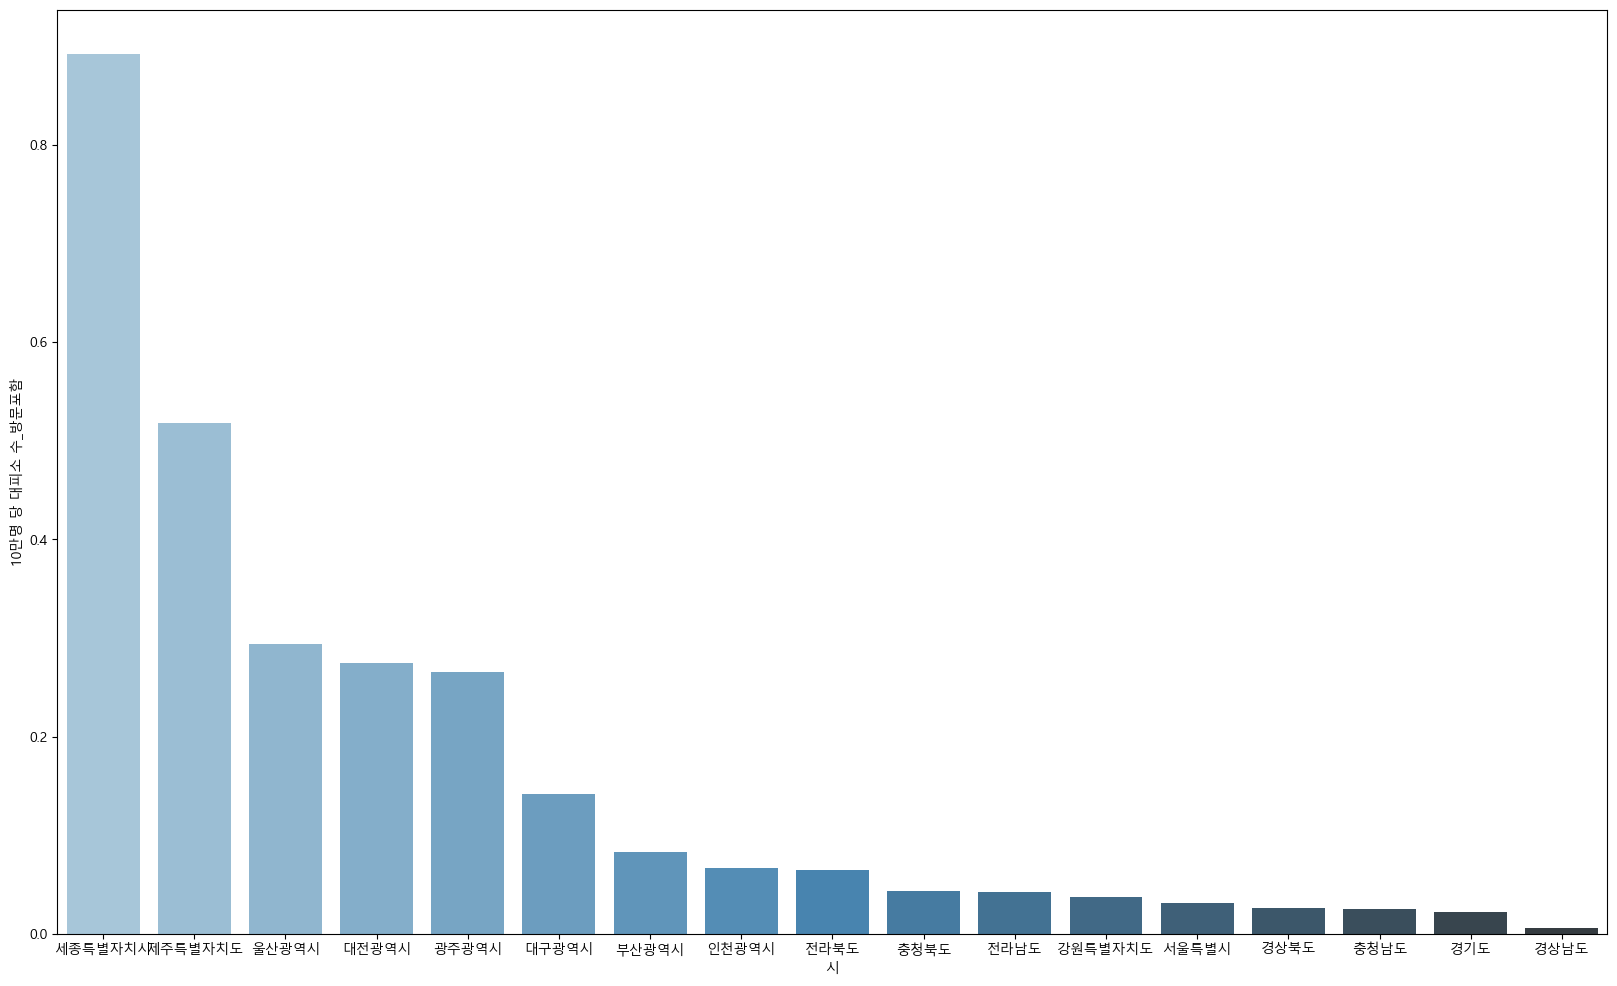

In [132]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df.sort_values(by='10만명 당 대피소 수_방문포함' ,ascending=False).reset_index().rename(columns={'index': '시'}), x="시", y='10만명 당 대피소 수_방문포함', palette="Blues_d")
plt.show()

# 세종시의 경우 인구 10만명으로 타 시도에 비해 인구가 매우 적어 제외, 관광 인구 반영 시 제주도가 (반영 전에 비해) 매우 달라진 수치 발견